Pranav Kumar
1032200232
N1

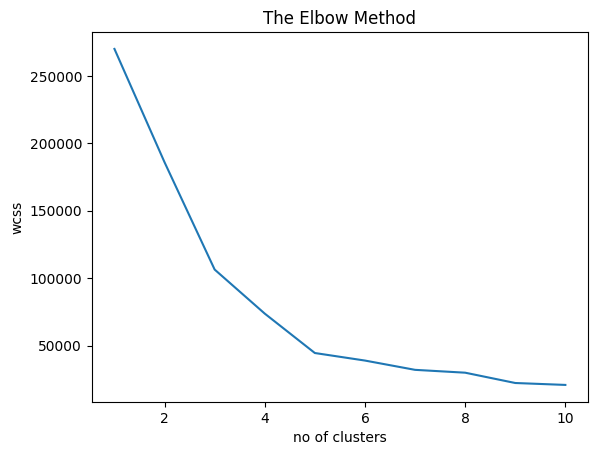

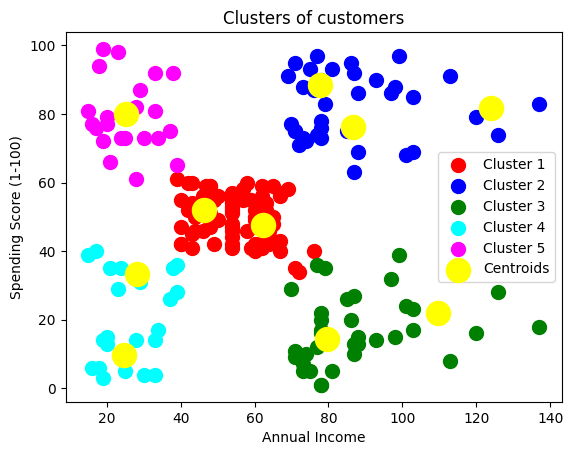

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


if __name__ == "__main__":
    dataset = pd.read_csv('Mall_Customers.csv')
    X= dataset.iloc[:, [3,4]].values

    wcss=[]

    for i in range(1,11):
        kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('wcss')
    plt.show()

kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [20]:
clusters = pd.DataFrame(y_kmeans,columns=['Cluster'])

In [21]:
clusters

,Cluster
0,3
1,4
2,3
3,4
4,3
...,...
195,1
196,2
197,1
198,2


In [22]:
dataset['clusters'] = clusters['Cluster']

In [23]:
dataset.to_csv('cluster_pred.csv')

In [24]:
high_value = dataset.loc[(dataset['clusters']==4)|(dataset['clusters']==1)]

In [25]:
high_value.to_csv('high-value-cust.csv')

Image Segmentation using K-Means Clustering

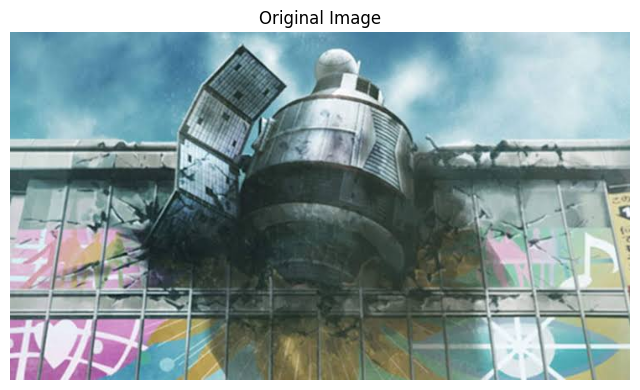

In [26]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

image = cv2.imread('sg 5.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

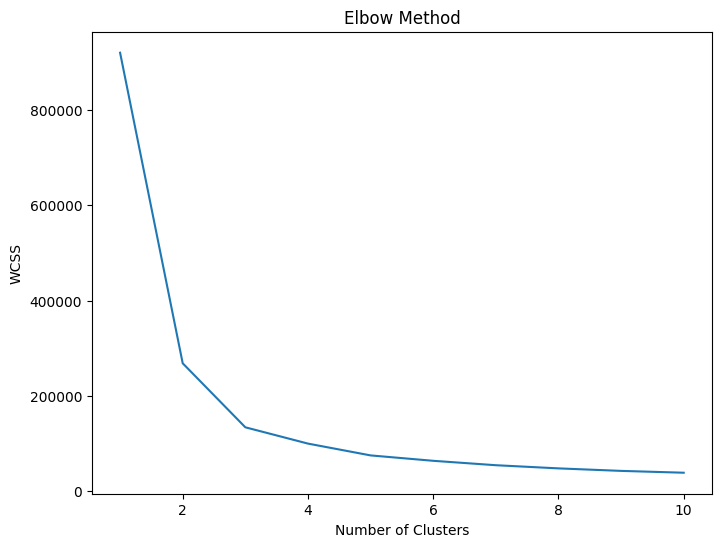

In [27]:
pixels = image.reshape(-1, 3)

scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(pixels_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

k = 3

kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
kmeans.fit(pixels_scaled)

labels = kmeans.labels_

segmented_image = labels.reshape(image.shape[:2])

color_map = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]])

segmented_image_color = color_map[segmented_image]

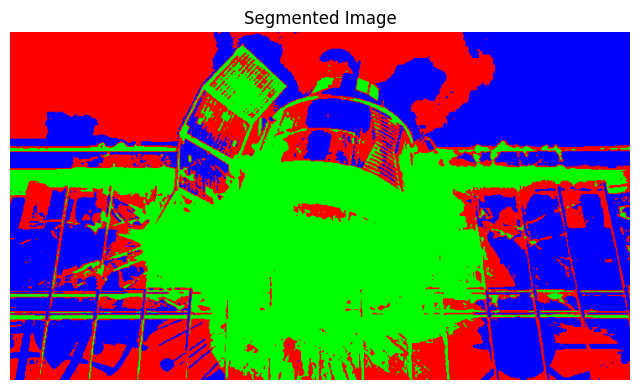

In [28]:
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image_color)
plt.title('Segmented Image')
plt.axis('off')
plt.show()